In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [3]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [4]:
data.shape

(23486, 11)

***Predicting rating based on the review.***

##### Handling null values

In [5]:
data.dtypes

Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
dtype: object

In [6]:
data.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

##### Handling null values

In [7]:
# Filling the categorical columns with mode value:

cat_col= ['Category','Subcategory1','SubCategory2']
for i in cat_col:
    mode_val= data[i].mode().values[0]
    data[i]= data[i].fillna(mode_val)

data.isna().sum()

Product ID           0
Category             0
Subcategory1         0
SubCategory2         0
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [8]:
### Removing the null values present in review text:

df=data[data['Review Text'].notna()].reset_index(drop=True)

In [9]:
df.drop(columns=['Review Title','Product ID'],inplace=True)

In [22]:
# Creating age group column:
df['Age Group']=pd.cut(df['Customer Age'],bins=range(0,101,10),labels=['0-10', '10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

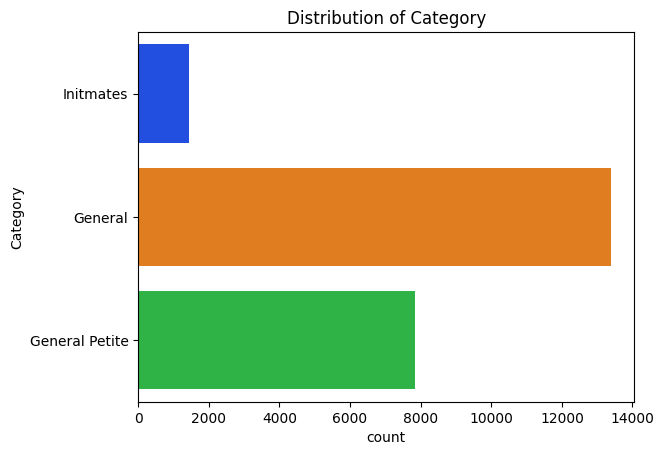

In [23]:
sns.countplot(df.Category,palette='bright')
plt.title('Distribution of Category')
plt.show()

Text(0.5, 1.0, 'Location count')

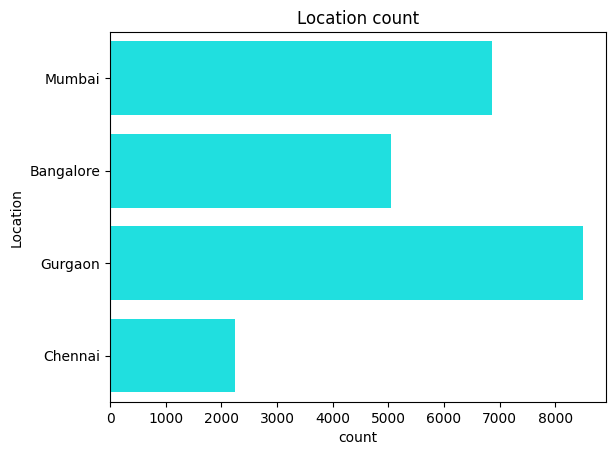

In [118]:
# Location from where maximum orders are placed:

sns.countplot(df['Location'],color='aqua')
plt.title('Location count')

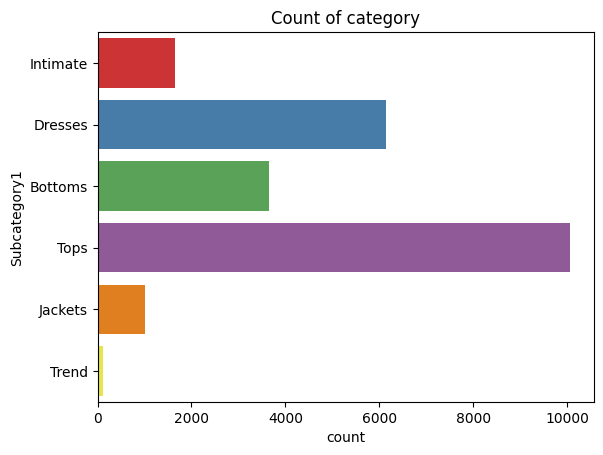

In [25]:
# Count of subcategory1:

sns.countplot(df['Subcategory1'],palette='Set1')
plt.title('Count of category')
plt.show()

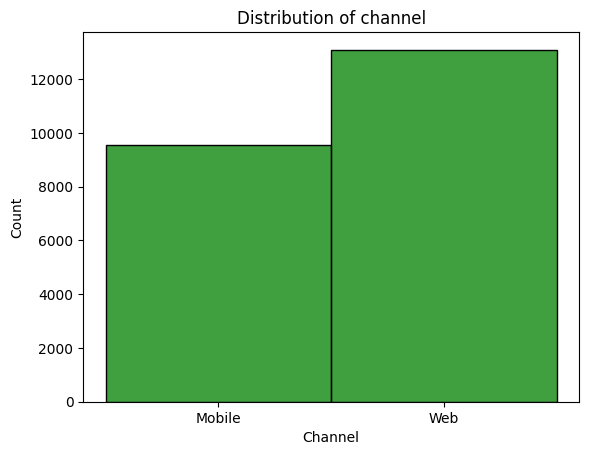

In [26]:
## channel used by customers:

sns.histplot(df['Channel'],color='green')
plt.title('Distribution of channel')
plt.show()

### Correlation matrix

<Axes: >

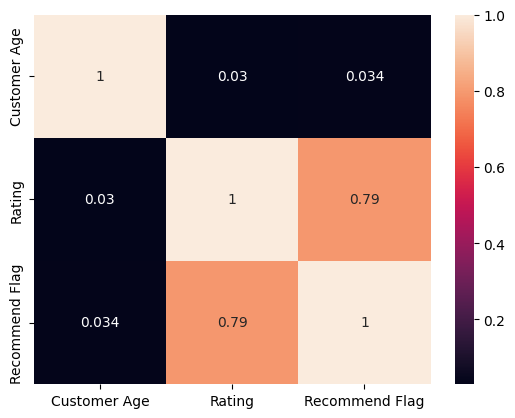

In [27]:
#plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [28]:
df1=df[['Review Text','Rating']]
df1.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


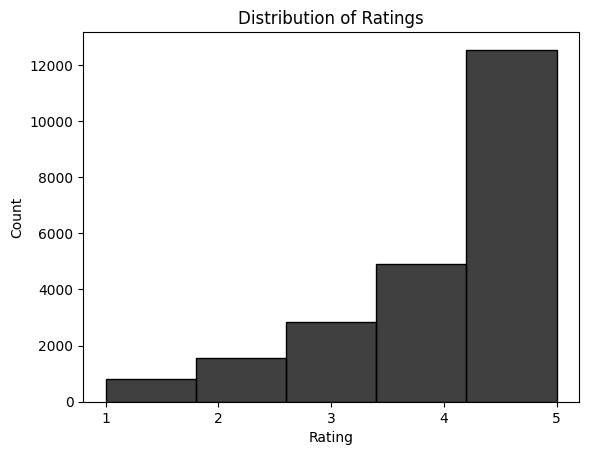

In [35]:
sns.histplot(df1['Rating'],color='black',bins=5)
plt.title('Distribution of Ratings')
plt.xticks(range(1,6))
plt.show()

#### Data Pre-processing

In [124]:
import contractions 
import re
import nltk
from nltk.stem import PorterStemmer , WordNetLemmatizer
ps=PorterStemmer()
nl= WordNetLemmatizer()
nltk.download('stopwords')
stop_words= nltk.corpus.stopwords.words('english') 
               

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
# Converting the entire corpus into lowercase:
def func_lowercase(text):
    text=text.lower()
    return(text)

# Expanding contractions:
def func_contractions(text):
    text=contractions.fix(text)
    return(text)

# Removing all the numerical values and special characters:
def func_special_char(text):
    text= re.sub(r'[^a-zA-Z\s]','', text)
    return(text)

#Removing extra spaces:
def func_extra_spaces(text):
    text= re.sub(r'\s+'," ", text)
    return(text)

# stemming:
def func_stem(text):
    text=[ps.stem(i) for i in text.split()]
    return(" ".join(text))

# Lemmatize:
def func_lemm(text):
    text=[ps.stem(i,'v') for i in text.split()]
    return(" ".join(text))

#Stopwords:
def func_stopwords(text):
    text=[i for i in text.split() if i not in stop_words]
    return(" ".join(text))

In [126]:
def func_dataclean(text):
    text= func_lowercase(text)
    text= func_contractions(text)
    text=func_special_char(text)
    text=func_extra_spaces(text)
    #text=func_stem(text)
    text=func_lemm(text)
    text=func_stopwords(text)

    return(text)

In [127]:
df1['clean_data']=df1['Review Text'].apply(func_dataclean)

In [128]:
df1[df1['clean_data']=='']

,Review Text,Rating,clean_data


In [129]:
df1.head(2)

,Review Text,Rating,clean_data
0,Absolutely wonderful - silky and sexy and comf...,4,absolut wonder silki sexi comfort
1,Love this dress! it's sooo pretty. i happene...,5,love thi dress sooo pretti happen find store g...


In [130]:
df1.Rating.value_counts(normalize=True)

Rating
5    0.553862
4    0.216775
3    0.124685
2    0.068416
1    0.036262
Name: proportion, dtype: float64

In [131]:
df1['Ratings']=np.where(df1['Rating'].isin([5,4]),'Outstanding', np.where(df1['Rating']==3,'Average', 'Below Average'))

In [132]:
df1.head()

,Review Text,Rating,clean_data,Ratings
0,Absolutely wonderful - silky and sexy and comf...,4,absolut wonder silki sexi comfort,Outstanding
1,Love this dress! it's sooo pretty. i happene...,5,love thi dress sooo pretti happen find store g...,Outstanding
2,I had such high hopes for this dress and reall...,3,high hope thi dress realli want work initi ord...,Average
3,"I love, love, love this jumpsuit. it's fun, fl...",5,love love love thi jumpsuit fun flirti fabul e...,Outstanding
4,This shirt is very flattering to all due to th...,5,thi shirt veri flatter due adjust front tie pe...,Outstanding


In [133]:
df_new=df1[['clean_data','Ratings']]
df_new.head()

,clean_data,Ratings
0,absolut wonder silki sexi comfort,Outstanding
1,love thi dress sooo pretti happen find store g...,Outstanding
2,high hope thi dress realli want work initi ord...,Average
3,love love love thi jumpsuit fun flirti fabul e...,Outstanding
4,thi shirt veri flatter due adjust front tie pe...,Outstanding


### Word clouds for the positive & negative reviews

In [134]:
positive_df=df_new[df_new['Ratings']=='Outstanding']
negative_df=df_new[df_new['Ratings']=='Below Average']

In [135]:
from wordcloud import WordCloud

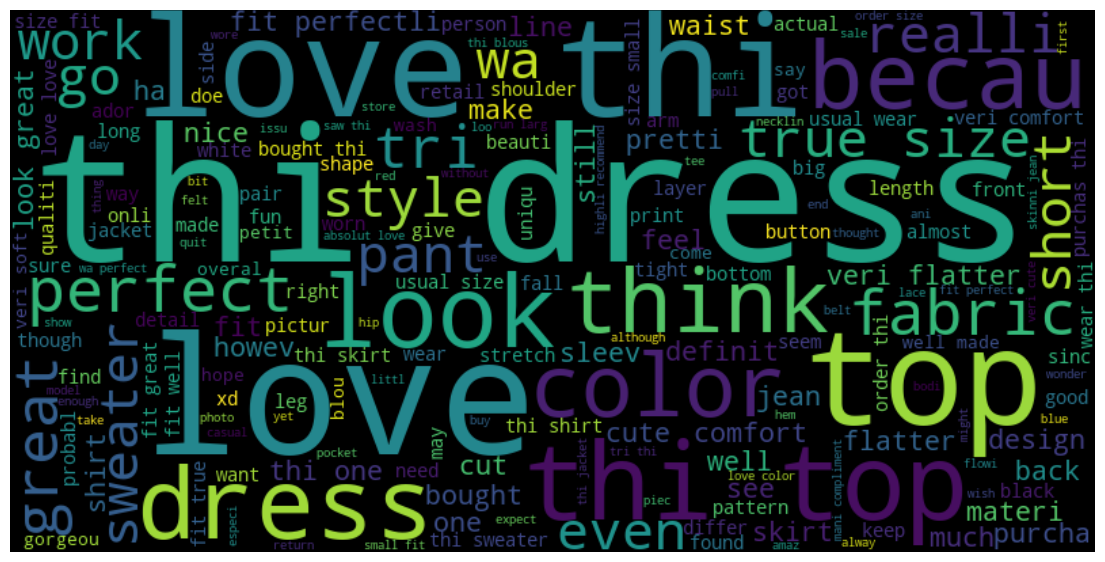

In [136]:
## Word Cloud for positive reviews:
positive_words=" ".join([word for word in positive_df['clean_data']])

word_cloud1=WordCloud(width=800, height=400, background_color='black').generate(positive_words)

plt.figure(figsize=(14, 8))
plt.imshow(word_cloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

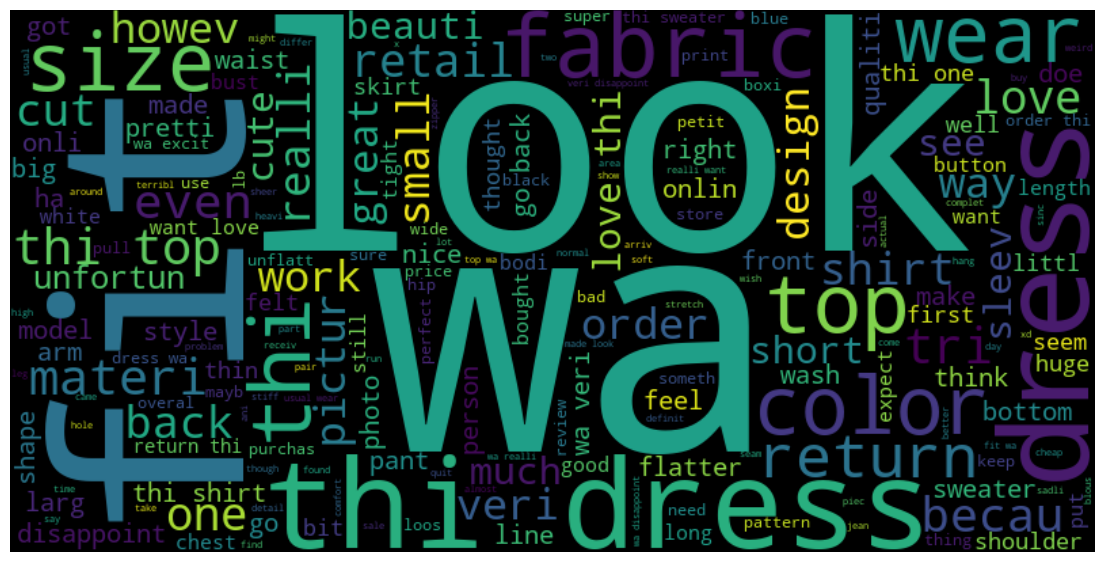

In [137]:
## Word Cloud for positive reviews:
negative_words=" ".join([word for word in negative_df['clean_data']])

word_cloud2=WordCloud(width=800, height=400, background_color='black').generate(negative_words)

plt.figure(figsize=(14, 8))
plt.imshow(word_cloud2,interpolation='bilinear')
plt.axis('off')
plt.show()

### Model Building

In [138]:
df_new.head()

,clean_data,Ratings
0,absolut wonder silki sexi comfort,Outstanding
1,love thi dress sooo pretti happen find store g...,Outstanding
2,high hope thi dress realli want work initi ord...,Average
3,love love love thi jumpsuit fun flirti fabul e...,Outstanding
4,thi shirt veri flatter due adjust front tie pe...,Outstanding


In [139]:
dict_= {'Outstanding':2, 'Average':1,  'Below Average':0}

df_new['ratings']=df_new['Ratings'].apply(lambda x: dict_[x])

In [140]:
df_new=df_new[['clean_data','ratings']]

In [141]:
df_new.head()

,clean_data,ratings
0,absolut wonder silki sexi comfort,2
1,love thi dress sooo pretti happen find store g...,2
2,high hope thi dress realli want work initi ord...,1
3,love love love thi jumpsuit fun flirti fabul e...,2
4,thi shirt veri flatter due adjust front tie pe...,2


In [142]:
df_new.shape

(22641, 2)

In [143]:
df_new.ratings.value_counts()

ratings
2    17448
1     2823
0     2370
Name: count, dtype: int64

In [144]:
df_new.ratings.value_counts(normalize=True)

ratings
2    0.770637
1    0.124685
0    0.104677
Name: proportion, dtype: float64

In [145]:
# # Balancing the dataset:

# out_df=df_new[df_new['ratings']==2].sample(n=2370,ignore_index=True)

# avg_df=df_new[df_new['ratings']==1].sample(n=2370,ignore_index=True)

# bel_df= df_new[df_new['ratings']==0]

# df_=pd.concat([out_df,avg_df, bel_df],axis=0, ignore_index=True)

# df_.ratings.value_counts()

#### Fasttext Embedding

In [146]:
import gensim

from gensim.models.fasttext import FastText
ftx= FastText(corpus)

def func_fasttext( doc, feature_size):
    vector= np.zeros((feature_size), dtype='float64')
    total_words= len(doc)

    for i in doc:
        vector= np.add(vector, ftx.wv[i])
        vector= np.divide(vector, total_words)

    return vector

fasttext_features=[]

for i in corpus:
    fasttext_features.append(func_fasttext(i.split(), 100))

ftx_df=pd.DataFrame(fasttext_features)

X=ftx_df.copy()
Y= df_new['ratings']


#### Decision Tree

In [149]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=25, stratify=Y)

dt1= DecisionTreeClassifier(max_depth=4,min_samples_split=37)
dt1.fit(xtrain, ytrain)

pred_dt1=dt1.predict(xtest)

accuracy_dt1=accuracy_score(ytest, pred_dt1)
accuracy_dt1
# Testing accuracy score on train set:
#accuracy_score(ytrain,dt1.predict(xtrain))



0.81873179475689

In [102]:
# Hypermeter Tuning
params={'min_samples_split':range(10,51), 'max_depth':range(2,11)}

from sklearn.model_selection import RandomizedSearchCV
rfc=RandomizedSearchCV(dt1, params)

rfc.fit(xtrain,ytrain)


rfc.best_params_

{'min_samples_split': 37, 'max_depth': 4}

#### Gradient boosting model

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(min_samples_split=10)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(min_samples_split=10)

In [196]:
pred_gbc=gbc.predict(xtest)
accuracy_gbc=accuracy_score(ytest, pred_gbc)

accuracy_gbc

0.8189558592874748

In [154]:
df2= df.copy()

In [155]:
df2.drop(columns=['Review Text','Rating'],inplace=True)
df2.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Recommend Flag,Age Group
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,1,30-40
1,General,Dresses,Dresses,Bangalore,Mobile,34,1,30-40
2,General,Dresses,Dresses,Gurgaon,Mobile,60,0,50-60
3,General Petite,Bottoms,Pants,Chennai,Web,50,1,40-50
4,General,Tops,Blouses,Bangalore,Web,47,1,40-50


### Classification models for predicting which customers are recommending

##### Converting categorical to numerical values

In [156]:
df2.dtypes

Category            object
Subcategory1        object
SubCategory2        object
Location            object
Channel             object
Customer Age         int64
Recommend Flag       int64
Age Group         category
dtype: object

In [157]:
df2.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer Age', 'Recommend Flag', 'Age Group'],
      dtype='object')

In [158]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

cat_col=['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel','Age Group']
for i in cat_col:
    df2[i]=le.fit_transform(df2[i])

In [159]:
df2

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Recommend Flag,Age Group
0,2,2,5,3,0,33,1,2
1,0,1,3,0,0,34,1,2
2,0,1,3,2,0,60,0,4
3,1,0,13,1,1,50,1,3
4,0,4,0,0,1,47,1,3
...,...,...,...,...,...,...,...,...
22636,1,1,3,2,0,34,1,2
22637,1,4,8,2,1,48,1,3
22638,1,1,3,2,1,31,0,2
22639,0,1,3,2,1,28,1,1


In [170]:
#### Concat the data:
new_df=pd.concat([df2,ftx_df],axis=1)
new_df.head(3)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Recommend Flag,Age Group,0,1,...,90,91,92,93,94,95,96,97,98,99
0,2,2,5,3,0,33,1,2,0.000178,0.000219,...,0.000405,0.000043,-0.000480,0.000279,-0.000170,-0.000177,-0.000291,-0.000342,0.000228,0.000064
1,0,1,3,0,0,34,1,2,0.000017,0.000077,...,0.000009,0.000075,0.000028,-0.000018,0.000041,-0.000044,-0.000083,-0.000013,0.000012,-0.000005
2,0,1,3,2,0,60,0,4,0.000687,0.001845,...,-0.003443,-0.004907,0.006602,-0.004053,-0.003908,-0.000961,0.004686,0.005095,0.005244,0.002360


In [171]:
#### Handling Outliers

In [172]:
col=['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel','Customer Age', 'Recommend Flag']

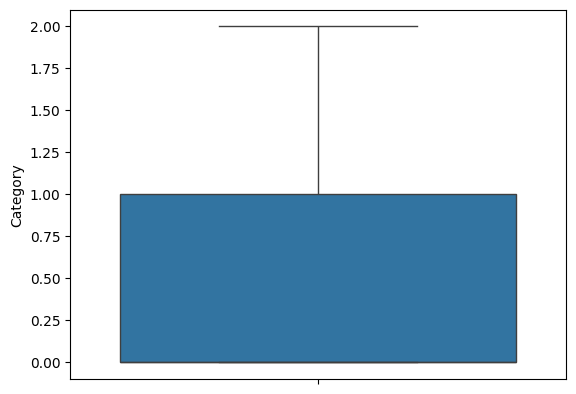

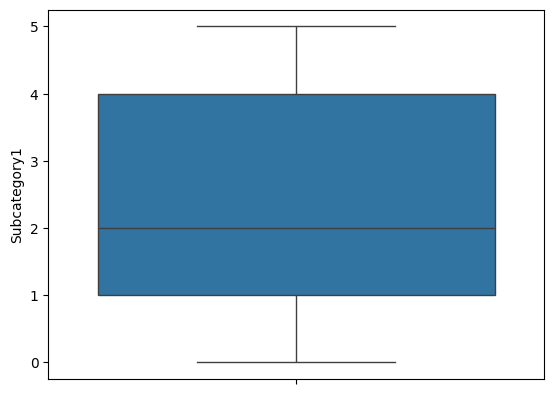

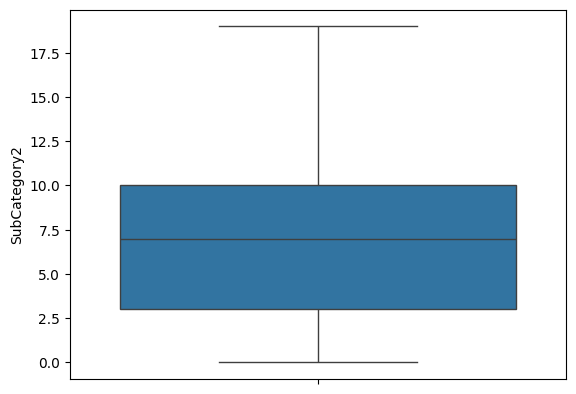

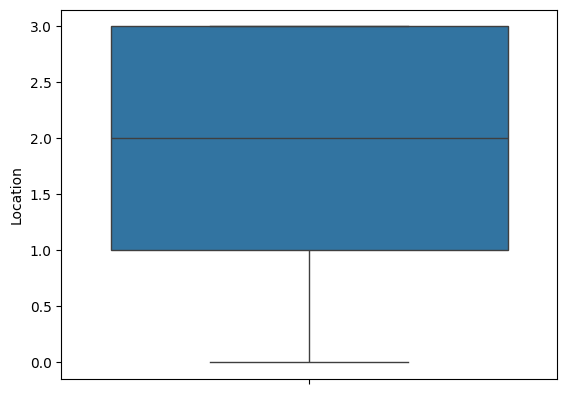

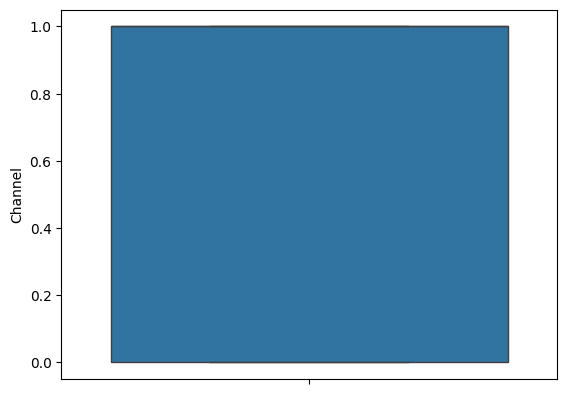

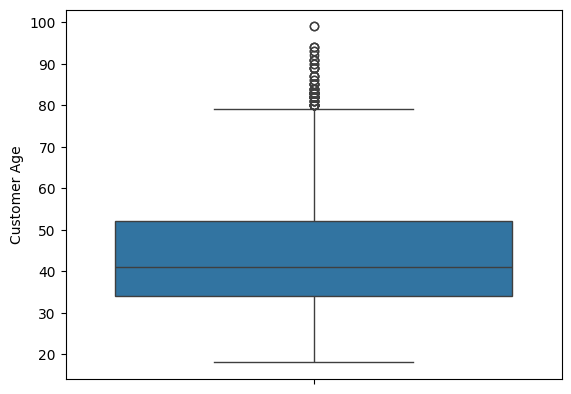

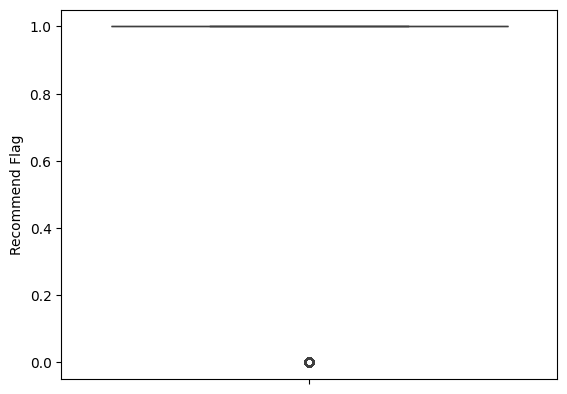

In [173]:
for i in col:
    sns.boxplot(new_df[i])
    plt.show()

In [174]:
q1= new_df['Customer Age'].quantile(.25)
q3= new_df['Customer Age'].quantile(.75)

IQR= q3-q1

ll= q1- 1.5* IQR
ul= q3 +1.5+ IQR

print(ll,ul)

7.0 71.5


In [175]:
new_df=new_df[(new_df['Customer Age']>=ll) & (new_df['Customer Age']<=ul)]

In [176]:
new_df.reset_index(drop=True, inplace=True)

In [169]:
new_df

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Recommend Flag,Age Group,aa,ab,...,yup,zag,zero,zig,zigzag,zillion,zip,zipper,zone,zoom
0,2,2,5,3,0,33,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0,1,3,0,0,34,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0,1,3,2,0,60,0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142619,0.131674,0.0,0.0
3,1,0,13,1,1,50,1,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0,4,0,0,1,47,1,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22310,1,1,3,2,0,34,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
22311,1,4,8,2,1,48,1,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
22312,1,1,3,2,1,31,0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
22313,0,1,3,2,1,28,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [177]:
new_df1=new_df.copy()
new_df1.drop(columns=['Recommend Flag'],inplace=True)

In [178]:
emb_df=new_df.iloc[:,8:]

In [179]:
X=new_df1[['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel','Customer Age','Age Group']]
Y=new_df['Recommend Flag']
Y.shape, X.shape

((22315,), (22315, 7))

#### Standarisation of data

In [180]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

xx=ss.fit_transform(X)

X_df= pd.DataFrame(xx)


In [186]:
df_X=pd.concat([X_df,emb_df],axis=1,ignore_index=True)

In [187]:
df_X.shape

(22315, 107)

In [205]:
### Check whether dataset is balanced ot not:
Y.value_counts(normalize=True)

Recommend Flag
1    0.818642
0    0.181358
Name: proportion, dtype: float64

It is giving the ratio of 80:20, therefore the data is slightly balanced

#### Train test split

In [189]:
train_x, test_x, train_y, test_y= train_test_split(df_X,Y, test_size=0.20, random_state=52, stratify=Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((17852, 107), (4463, 107), (17852,), (4463,))

#### Model Training

In [191]:
dt_model= DecisionTreeClassifier(min_samples_split=37, max_depth=4)
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4, min_samples_split=37)

#### Model Evaluation

In [198]:
pred_dt_model=dt_model.predict(test_x)
accuracy_dt_model=accuracy_score(test_y, pred_dt_model)
accuracy_dt_model

0.8341922473672417

#### Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(train_x,train_y)

LogisticRegression()

In [206]:
### Model Evaluation:
pred_lr=lr.predict(test_x)

accuracy_score(test_y,pred_lr)

0.81873179475689

We have trained our model on both the logistic regression model and decision tree model, both the model has given the accuracy which is above 80%.
Hence we can use any algorithm for the modelling purpose.